In [1]:
!nvidia-smi

Mon Feb 17 23:11:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch
torch.cuda.is_available()
# Output would be True if Pytorch is using GPU otherwise it would be False.

True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:

from IPython import display
display.clear_output()


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import display, Image


In [7]:
%cd /content/drive/MyDrive/pet_classifier/

/content/drive/MyDrive/pet_classifier


In [8]:
!pwd

/content/drive/MyDrive/pet_classifier


In [9]:
# Define paths
train_dir = "/content/drive/MyDrive/pet_classifier/train"
val_dir = "/content/drive/MyDrive/pet_classifier/test"
test_dir = "/content/drive/MyDrive/pet_classifier/test"

# Image settings
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [10]:
# Data augmentation & preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Found 5542 images belonging to 37 classes.
Found 741 images belonging to 37 classes.
Found 741 images belonging to 37 classes.


In [11]:
import json

# Save class indices
with open("class_indices.json", "w") as f:
    json.dump(train_generator.class_indices, f)


In [12]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 37)                  │           4,773 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,173,733 (42.62 MB)

 Trainable params: 11,173,733 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
EPOCHS = 100

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 2249s 13s/step - accuracy: 0.0300 - loss: 3.6739 - val_accuracy: 0.0567 - val_loss: 3.5394
Epoch 2/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 96s 553ms/step - accuracy: 0.0461 - loss: 3.5525 - val_accuracy: 0.0783 - val_loss: 3.4954
Epoch 3/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 95s 549ms/step - accuracy: 0.0503 - loss: 3.5183 - val_accuracy: 0.0702 - val_loss: 3.4709
Epoch 4/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 96s 549ms/step - accuracy: 0.0662 - loss: 3.4826 - val_accuracy: 0.0810 - val_loss: 3.4022
Epoch 5/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 142s 547ms/step - accuracy: 0.0672 - loss: 3.4562 - val_accuracy: 0.0891 - val_loss: 3.3690
Epoch 6/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 95s 549ms/step - accuracy: 0.0703 - loss: 3.4334 - val_accuracy: 0.0945 - val_loss: 3.3538
Epoch 7/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 96s 550ms/step - accuracy: 0.0866 - loss: 3.3907 - val_accuracy: 0.1161 - val_loss: 3.2971
Epoch 8/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 97s 558ms/step - accuracy: 0.0840 

In [15]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - accuracy: 0.4197 - loss: 2.0652
Test Accuracy: 0.39


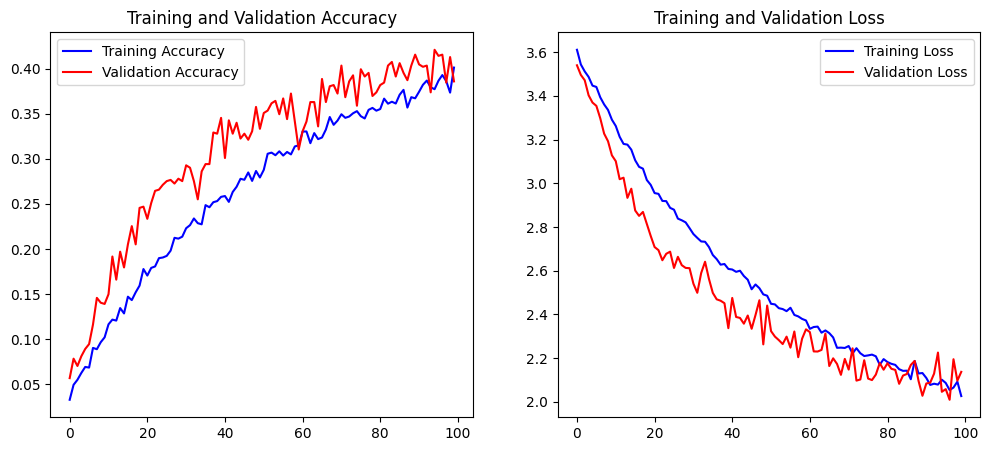

In [16]:
import matplotlib.pyplot as plt

# Assuming `history` is returned from model.fit()
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Call function after training
plot_training(history)


In [17]:
import numpy as np

# Get all images and labels from the test set
X_test, y_test = [], []

for images, labels in test_generator:
    X_test.append(images)
    y_test.append(labels)
    if len(X_test) * test_generator.batch_size >= test_generator.samples:
        break

# Convert list of batches to numpy arrays
X_test = np.vstack(X_test)
y_test = np.vstack(y_test)



24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


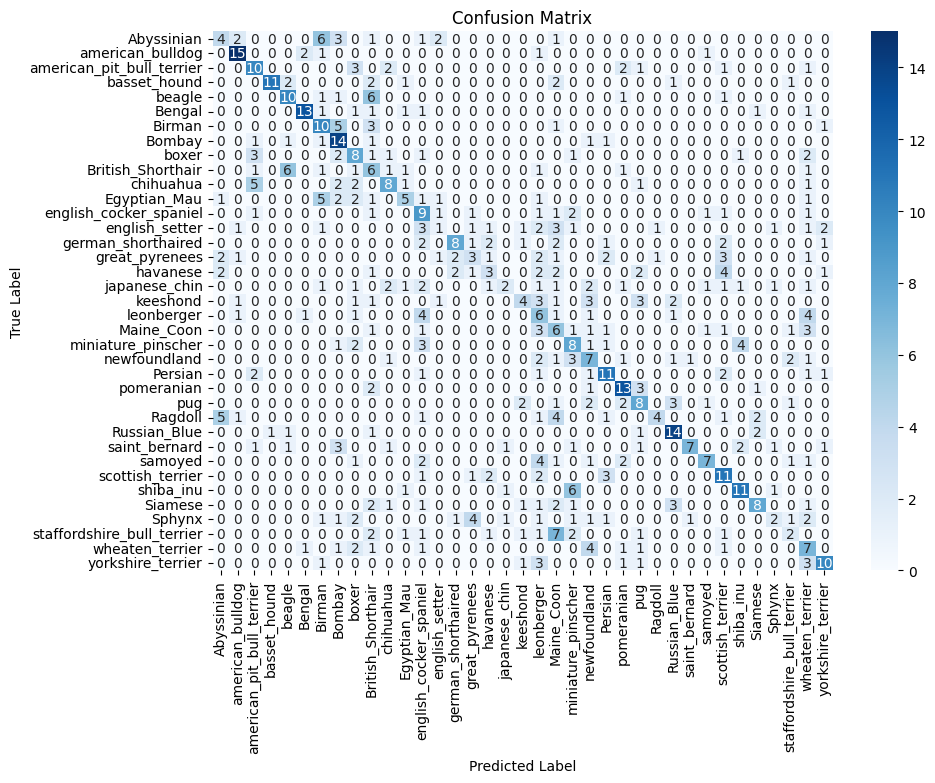

In [18]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test, class_names):
    # Predict labels
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Example usage:
class_names = ["Abyssinian", "american_bulldog", "american_pit_bull_terrier","basset_hound", "beagle", "Bengal", "Birman",
                   "Bombay", "boxer", "British_Shorthair", "chihuahua", "Egyptian_Mau", "english_cocker_spaniel", "english_setter",
                    "german_shorthaired", "great_pyrenees", "havanese", "japanese_chin", "keeshond", "leonberger", "Maine_Coon",
                     "miniature_pinscher", "newfoundland", "Persian", "pomeranian", "pug", "Ragdoll", "Russian_Blue", "saint_bernard",
                      "samoyed", "scottish_terrier", "shiba_inu", "Siamese", "Sphynx", "staffordshire_bull_terrier", "wheaten_terrier",
                       "yorkshire_terrier"]
plot_confusion_matrix(model, X_test, y_test, class_names)


In [19]:
model.save('/content/drive/MyDrive/pet_classifier/classifier3333333.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


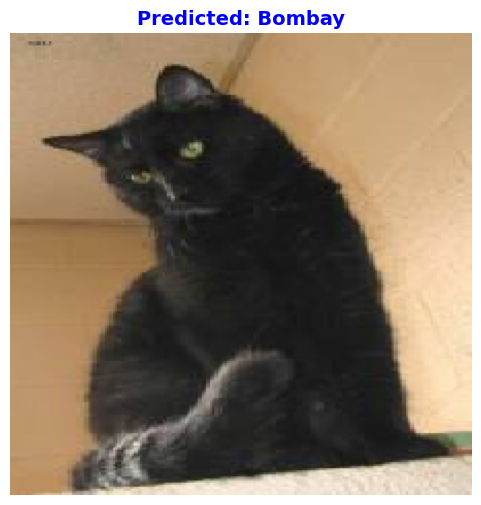

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
def predict_and_plot(img_path, model, train_generator):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # Get class label
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    # Plot the image with label
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_label}", fontsize=14, fontweight="bold", color="blue")
    plt.show()

# Call the function
predict_and_plot("/content/drive/MyDrive/pet_classifier/test/Bombay/Bombay_104.jpg", model, train_generator)